# Data Review and Preprocessing


In [52]:
#All Libraries
import pandas as pd
import spacy
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import make_pipeline
from textblob import TextBlob
!pip install wordcloud
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,confusion_matrix
import seaborn as sns

In [53]:
#Import dataset and checking data

df = pd.read_csv('stockerbot.csv', index_col=0)
df.head()

,text,timestamp,source,symbols,company_names,url,verified,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16
id,,,,,,,,,,,,,,,,
1.0197E+18,VIDEO: “I was in my office. I was minding my o...,Wed Jul 18 21:33:26 +0000 2018,GoldmanSachs,GS,The Goldman Sachs,https://twitter.com/i/web/status/1019696670777...,TRUE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1.01971E+18,The price of lumber $LB_F is down 22% since hi...,Wed Jul 18 22:22:47 +0000 2018,StockTwits,M,Macy's,https://twitter.com/i/web/status/1019709091038...,TRUE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1.01971E+18,Who says the American Dream is dead? https://t...,Wed Jul 18 22:32:01 +0000 2018,TheStreet,AIG,American,https://buff.ly/2L3kmc4,TRUE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1.01972E+18,Barry Silbert is extremely optimistic on bitco...,Wed Jul 18 22:52:52 +0000 2018,MarketWatch,BTC,Bitcoin,https://twitter.com/i/web/status/1019716662587...,TRUE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1.01972E+18,How satellites avoid attacks and space junk wh...,Wed Jul 18 23:00:01 +0000 2018,Forbes,ORCL,Oracle,http://on.forbes.com/6013DqDDU,TRUE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [54]:
#Removing "Unamed columns"
columns_to_remove = ['Unnamed: 8', 'Unnamed: 9', 'Unnamed: 10', 'Unnamed: 11',
                      'Unnamed: 12', 'Unnamed: 13', 'Unnamed: 14', 'Unnamed: 15', 'Unnamed: 16']

# Drop the specified columns
df = df.drop(columns=columns_to_remove, errors='ignore')

# Save the modified DataFrame to a new CSV file or overwrite the existing one
df.to_csv('modified_stockerbot.csv', index=False)


In [ ]:
df.head()

In [56]:
#Change data types so they're better for analysis
df["text"] = df["text"].astype(str)
df["company_names"] = df["company_names"].astype("category")
df["symbols"] = df["symbols"].astype("category")
df["source"] = df["source"].astype("category")


In [57]:
#Checking data after change
df.head()

,text,timestamp,source,symbols,company_names,url,verified
id,,,,,,,
1.0197E+18,VIDEO: “I was in my office. I was minding my o...,Wed Jul 18 21:33:26 +0000 2018,GoldmanSachs,GS,The Goldman Sachs,https://twitter.com/i/web/status/1019696670777...,TRUE
1.01971E+18,The price of lumber $LB_F is down 22% since hi...,Wed Jul 18 22:22:47 +0000 2018,StockTwits,M,Macy's,https://twitter.com/i/web/status/1019709091038...,TRUE
1.01971E+18,Who says the American Dream is dead? https://t...,Wed Jul 18 22:32:01 +0000 2018,TheStreet,AIG,American,https://buff.ly/2L3kmc4,TRUE
1.01972E+18,Barry Silbert is extremely optimistic on bitco...,Wed Jul 18 22:52:52 +0000 2018,MarketWatch,BTC,Bitcoin,https://twitter.com/i/web/status/1019716662587...,TRUE
1.01972E+18,How satellites avoid attacks and space junk wh...,Wed Jul 18 23:00:01 +0000 2018,Forbes,ORCL,Oracle,http://on.forbes.com/6013DqDDU,TRUE


In [58]:
# Load the spaCy language model
nlp = spacy.load('en_core_web_sm')

# Assuming your DataFrame is named df and 'text' is the column containing the tweet text
# Create a new column 'language' to store the detected language for each tweet
df['language'] = df['text'].apply(lambda x: nlp(x).lang_ if type(x) == str else None)

# Filter out tweets that are in English
df = df[df['language'] == 'en']

df.head()

,text,timestamp,source,symbols,company_names,url,verified,language
id,,,,,,,,
1.0197E+18,VIDEO: “I was in my office. I was minding my o...,Wed Jul 18 21:33:26 +0000 2018,GoldmanSachs,GS,The Goldman Sachs,https://twitter.com/i/web/status/1019696670777...,TRUE,en
1.01971E+18,The price of lumber $LB_F is down 22% since hi...,Wed Jul 18 22:22:47 +0000 2018,StockTwits,M,Macy's,https://twitter.com/i/web/status/1019709091038...,TRUE,en
1.01971E+18,Who says the American Dream is dead? https://t...,Wed Jul 18 22:32:01 +0000 2018,TheStreet,AIG,American,https://buff.ly/2L3kmc4,TRUE,en
1.01972E+18,Barry Silbert is extremely optimistic on bitco...,Wed Jul 18 22:52:52 +0000 2018,MarketWatch,BTC,Bitcoin,https://twitter.com/i/web/status/1019716662587...,TRUE,en
1.01972E+18,How satellites avoid attacks and space junk wh...,Wed Jul 18 23:00:01 +0000 2018,Forbes,ORCL,Oracle,http://on.forbes.com/6013DqDDU,TRUE,en


In [59]:
print(df.isna().sum())

text                0
timestamp           2
source              3
symbols             3
company_names       5
url              6391
verified            4
language            0
dtype: int64


In [60]:
df = df.dropna(subset=['timestamp', 'source', 'symbols', 'company_names', 'verified'])
print(df.isna().sum())

text                0
timestamp           0
source              0
symbols             0
company_names       0
url              6387
verified            0
language            0
dtype: int64


In [61]:
language_counts = df['language'].value_counts()

# Display the count of tweets for each language
print(language_counts)


en    28435
Name: language, dtype: int64


In [62]:
df = df[df['language'] == 'en']


In [63]:
# Download NLTK stopwords data
nltk.download('stopwords')

# Convert text columns to lowercase
df['text'] = df['text'].str.lower()

# Load stop words
stop_words = set(stopwords.words('english'))

# Define the clean_text function
def clean_text(text):
    # Remove URLs
    text = re.sub(r'http\S+', '', text)

    # Remove special characters, numbers, and punctuation
    text = re.sub(r'[^a-zA-Z\s]', '', text)

    # Convert to lowercase
    text = text.lower()

    # Remove stop words
    text = ' '.join(word for word in text.split() if word not in stop_words)

    return text

# Apply the clean_text function to the 'text' column of your dataset
df['text'] = df['text'].apply(clean_text)

# Save the modified DataFrame to a new CSV file or overwrite the existing one
df.to_csv('modified_stockerbot.csv', index=False)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [64]:
df.head()

,text,timestamp,source,symbols,company_names,url,verified,language
id,,,,,,,,
1.0197E+18,video office minding business david solomon te...,Wed Jul 18 21:33:26 +0000 2018,GoldmanSachs,GS,The Goldman Sachs,https://twitter.com/i/web/status/1019696670777...,TRUE,en
1.01971E+18,price lumber lbf since hitting ytd highs macys...,Wed Jul 18 22:22:47 +0000 2018,StockTwits,M,Macy's,https://twitter.com/i/web/status/1019709091038...,TRUE,en
1.01971E+18,says american dream dead,Wed Jul 18 22:32:01 +0000 2018,TheStreet,AIG,American,https://buff.ly/2L3kmc4,TRUE,en
1.01972E+18,barry silbert extremely optimistic bitcoin pre...,Wed Jul 18 22:52:52 +0000 2018,MarketWatch,BTC,Bitcoin,https://twitter.com/i/web/status/1019716662587...,TRUE,en
1.01972E+18,satellites avoid attacks space junk circling e...,Wed Jul 18 23:00:01 +0000 2018,Forbes,ORCL,Oracle,http://on.forbes.com/6013DqDDU,TRUE,en


In [65]:
#Tokenizing the text and splitting it into individual words/tokens
from nltk.tokenize import word_tokenize

# Download NLTK tokenization data
nltk.download('punkt')

# Tokenize the 'text' column in your dataset
df['tokenized_text'] = df['text'].apply(lambda x: word_tokenize(str(x)))

# Save the modified DataFrame to a new CSV file or overwrite the existing one
df.to_csv('modified_stockerbot.csv', index=False)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [66]:
# Convert the 'timestamp' column to datetime format
df['timestamp'] = pd.to_datetime(df['timestamp'], format='%a %b %d %H:%M:%S +0000 %Y')

# Save the modified DataFrame to a new CSV file or overwrite the existing one
df.to_csv('modified_stockerbot.csv')

In [67]:
df.head()

,text,timestamp,source,symbols,company_names,url,verified,language,tokenized_text
id,,,,,,,,,
1.0197E+18,video office minding business david solomon te...,2018-07-18 21:33:26,GoldmanSachs,GS,The Goldman Sachs,https://twitter.com/i/web/status/1019696670777...,TRUE,en,"[video, office, minding, business, david, solo..."
1.01971E+18,price lumber lbf since hitting ytd highs macys...,2018-07-18 22:22:47,StockTwits,M,Macy's,https://twitter.com/i/web/status/1019709091038...,TRUE,en,"[price, lumber, lbf, since, hitting, ytd, high..."
1.01971E+18,says american dream dead,2018-07-18 22:32:01,TheStreet,AIG,American,https://buff.ly/2L3kmc4,TRUE,en,"[says, american, dream, dead]"
1.01972E+18,barry silbert extremely optimistic bitcoin pre...,2018-07-18 22:52:52,MarketWatch,BTC,Bitcoin,https://twitter.com/i/web/status/1019716662587...,TRUE,en,"[barry, silbert, extremely, optimistic, bitcoi..."
1.01972E+18,satellites avoid attacks space junk circling e...,2018-07-18 23:00:01,Forbes,ORCL,Oracle,http://on.forbes.com/6013DqDDU,TRUE,en,"[satellites, avoid, attacks, space, junk, circ..."


#Topic Classification:
Predicting the companies that will be tweeted about based on the text



In [68]:
# Split the data into training and testing sets
train_data, test_data, train_labels, test_labels = train_test_split(
    df['text'], df['symbols'], test_size=0.2, random_state=42
)

# Create a pipeline with TF-IDF vectorizer and a classifier (Multinomial Naive Bayes)
model = make_pipeline(TfidfVectorizer(), MultinomialNB())

# Encode the target variable into numerical labels
label_encoder = LabelEncoder()
train_labels_encoded = label_encoder.fit_transform(train_labels)

# Train the model
model.fit(train_data, train_labels_encoded)

# Predict the topics on the test set
predictions = model.predict(test_data)

# Decode the numerical labels back to original symbols
predicted_topics = label_encoder.inverse_transform(predictions)

# Evaluate the model
accuracy = accuracy_score(test_labels, predicted_topics)
classification_report_output = classification_report(test_labels, predicted_topics)

# Display the results
print(f"Accuracy: {accuracy}")
print("Classification Report:")
print(classification_report_output)


Accuracy: 0.7223492175136276
Classification Report:
              precision    recall  f1-score   support

           A       0.60      0.15      0.24        20
        AABA       1.00      0.75      0.86        12
         AAL       0.68      0.76      0.72        17
        AAOI       1.00      0.91      0.95        11
         AAP       1.00      0.86      0.92        14
        AAPL       1.00      0.29      0.44         7
        ABBV       0.60      0.75      0.67        16
         ABC       0.76      1.00      0.87        13
        ABEV       0.00      0.00      0.00         7
         ABT       0.67      0.18      0.29        11
         ABX       1.00      0.58      0.74        12
         ACN       0.77      0.94      0.85        18
        ADBE       1.00      0.64      0.78        14
         ADI       1.00      0.88      0.93         8
         ADM       1.00      0.55      0.71        11
         ADP       1.00      0.93      0.96        14
         ADS       1.00      

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [94]:
print(len(train_data))

22748


# Sentiment Analysis

In [69]:
#Applying TextBlob tool to text to give sentiment
df['sentiment'] = df['text'].apply(lambda x: TextBlob(str(x)).sentiment.polarity)

# Define custom thresholds for sentiment labels
positive_threshold = 0.2  # Adjustable
negative_threshold = -0.2  # Adjustable

# Apply sentiment labels: 'positive,' 'neutral,' or 'negative'
df['sentiment_label'] = df['sentiment'].apply(
    lambda x: 'positive' if x > positive_threshold else 'neutral' if abs(x) <= positive_threshold else 'negative'
)


# Display the DataFrame with sentiment labels
print(df[['text', 'sentiment', 'sentiment_label']])


                                                          text  sentiment  \
id                                                                          
1.0197E+18   video office minding business david solomon te...   0.000000   
1.01971E+18  price lumber lbf since hitting ytd highs macys...   0.000000   
1.01971E+18                           says american dream dead  -0.100000   
1.01972E+18  barry silbert extremely optimistic bitcoin pre...   0.005682   
1.01972E+18  satellites avoid attacks space junk circling e...   0.000000   
...                                                        ...        ...   
1.01973E+18                                    fb acfdafcbaecf   0.000000   
1.01973E+18                                                btc   0.000000   
1.01973E+18  rt investinhd nuff said tel telcoin telfam cry...   0.000000   
1.01973E+18                                                btc   0.000000   
1.01973E+18  stellar xlm price binance registration open li...   0.059524   

In [70]:
sentiment_counts = df['sentiment_label'].value_counts()

# Display the counts
print(sentiment_counts)

neutral     23801
positive     3939
negative      695
Name: sentiment_label, dtype: int64


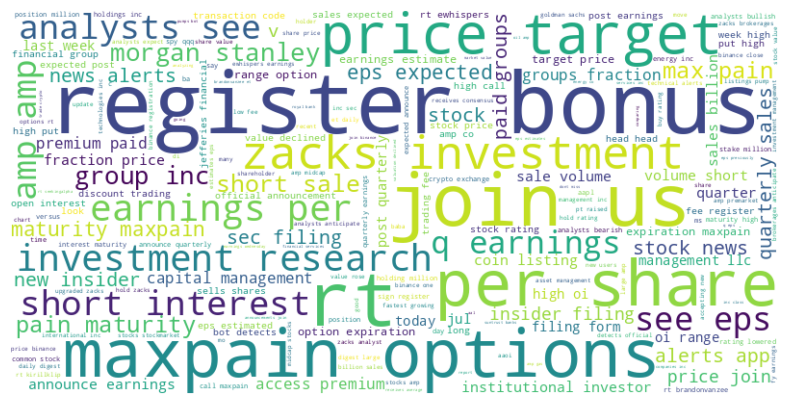

In [71]:
# Assuming df is your DataFrame and 'text' is the column containing untokenized text
text_corpus = ' '.join(df['text'])

# Generate a word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text_corpus)

# Display the generated word cloud using Matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


In [72]:
X=df['text']
y=df['sentiment_label']
X_train_t,X_test_t, y_train,  y_test=train_test_split(X,y,test_size=0.2)


# Create count vectoriser
vectorizer = CountVectorizer(ngram_range=(1, 2)
                            ,max_features=1000)

# Transform training corpus into feature matrix
X = vectorizer.fit_transform(X_train_t)
feature_names = vectorizer.get_feature_names_out()

X_train = pd.DataFrame(data=X.toarray(),columns=feature_names)

In [93]:
len(X_train)
len(y_train)

22748

In [73]:
X_train.sample(5)

,aa,aaba,aal,aaoi,aap,aapl,abbv,abc,abt,abt ms,...,xom,year,years,yndx,yum,zacks,zacks analysts,zacks brokerages,zacks investment,zts
12623,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6886,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8142,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
17266,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
22241,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [74]:
X = vectorizer.transform(X_test_t.astype(str))

X_test = pd.DataFrame(data=X.toarray(),columns=feature_names)

In [75]:
# Min-Max scalling
x_max = X_train.max()
x_min = X_train.min()

X_train = (X_train - x_min)/x_max
X_test = (X_test - x_min)/x_max

In [76]:
X_train.sample(5)

,aa,aaba,aal,aaoi,aap,aapl,abbv,abc,abt,abt ms,...,xom,year,years,yndx,yum,zacks,zacks analysts,zacks brokerages,zacks investment,zts
10268,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5865,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
17674,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4203,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2965,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Modelling

In [77]:
model = SVC(kernel='linear', C=.75).fit(X_train, y_train)

#get predictions on test set
y_pred_tr = model.predict(X_train)
y_pred = model.predict(X_test)
accuracy_tr = accuracy_score(y_train,y_pred_tr)
#accuracy on test set
accuracy = accuracy_score(y_test,y_pred)
print("Train Accuracy: {}".format(accuracy_tr))
print("Test Accuracy: {}".format(accuracy))

Train Accuracy: 0.9267188324248286
Test Accuracy: 0.9192896078776156


Text(0.5, 68.24999999999999, 'Predicted')

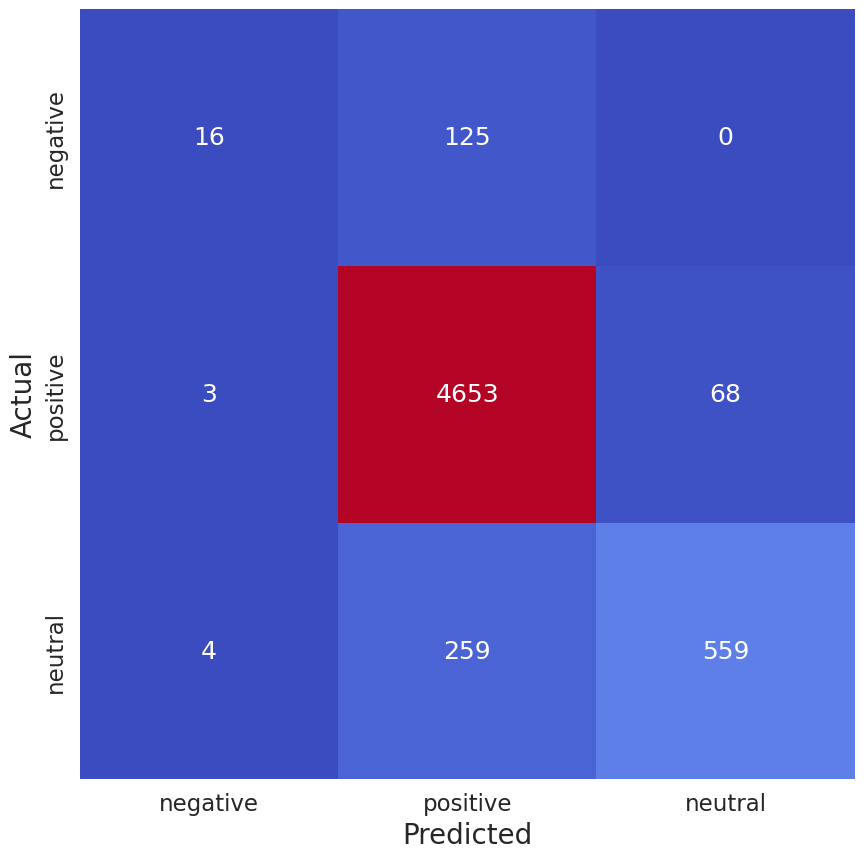

In [78]:
conf_matrix = confusion_matrix(y_test,y_pred)
conf_matrix = pd.DataFrame(data = conf_matrix,
                              columns=['negative','positive', 'neutral'],
                              index=['negative','positive', 'neutral'])

#plot confusion matrix
plt.figure(figsize=(10, 10), facecolor='w', edgecolor='k')
sns.set(font_scale=1.5)
sns.heatmap(conf_matrix,cmap='coolwarm',annot=True,fmt='.5g',cbar=False)
plt.ylabel('Actual',size=20)
plt.xlabel('Predicted',size=20)

In [79]:
y_train.value_counts()

neutral     19077
positive     3117
negative      554
Name: sentiment_label, dtype: int64

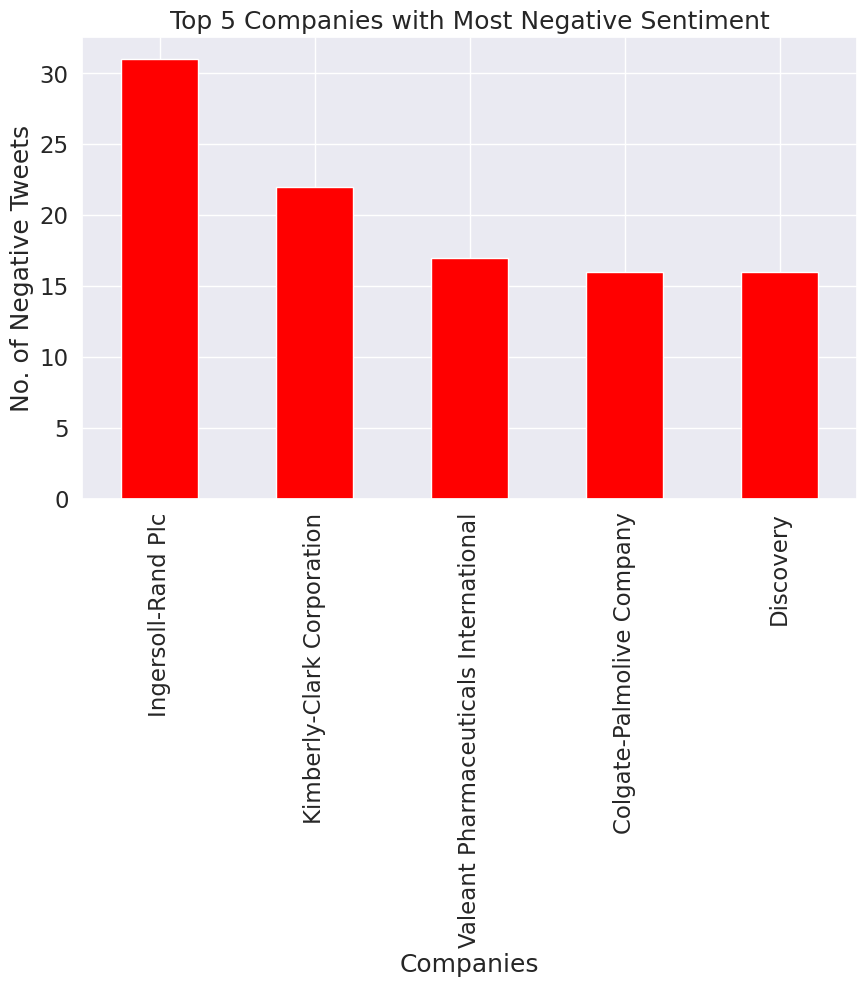

In [88]:
#Bar charts that display companies with most positive and negative sentiment
negative_sentiments = df[df['sentiment_label'] == 'negative']

# Group by company and count the occurrences
top_negative_companies = negative_sentiments['company_names'].value_counts().head(5)

# Plot the top 5 companies with negative sentiment
plt.figure(figsize=(10, 6))
top_negative_companies.plot(kind='bar', color='red')
plt.title('Top 5 Companies with Most Negative Sentiment')
plt.xlabel('Companies')
plt.ylabel('No. of Negative Tweets')
plt.show()




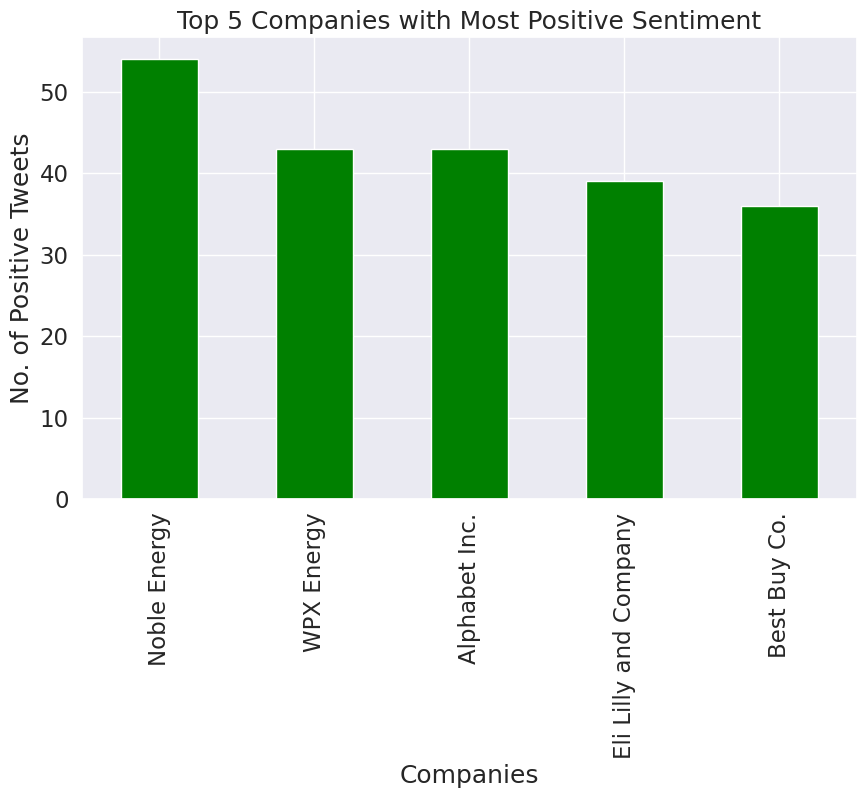

In [89]:
#bar chart with top 5 companies with most positive sentiment
positive_sentiments = df[df['sentiment_label'] == 'positive']
top_positive_companies = positive_sentiments['company_names'].value_counts().head(5)

plt.figure(figsize=(10, 6))
top_positive_companies.plot(kind='bar', color='green')
plt.title('Top 5 Companies with Most Positive Sentiment')
plt.xlabel('Companies')
plt.ylabel('No. of Positive Tweets')
plt.show()

In [90]:
df.head()

,text,timestamp,source,symbols,company_names,url,verified,language,tokenized_text,sentiment,sentiment_label
id,,,,,,,,,,,
1.0197E+18,video office minding business david solomon te...,2018-07-18 21:33:26,GoldmanSachs,GS,The Goldman Sachs,https://twitter.com/i/web/status/1019696670777...,TRUE,en,"[video, office, minding, business, david, solo...",0.000000,neutral
1.01971E+18,price lumber lbf since hitting ytd highs macys...,2018-07-18 22:22:47,StockTwits,M,Macy's,https://twitter.com/i/web/status/1019709091038...,TRUE,en,"[price, lumber, lbf, since, hitting, ytd, high...",0.000000,neutral
1.01971E+18,says american dream dead,2018-07-18 22:32:01,TheStreet,AIG,American,https://buff.ly/2L3kmc4,TRUE,en,"[says, american, dream, dead]",-0.100000,neutral
1.01972E+18,barry silbert extremely optimistic bitcoin pre...,2018-07-18 22:52:52,MarketWatch,BTC,Bitcoin,https://twitter.com/i/web/status/1019716662587...,TRUE,en,"[barry, silbert, extremely, optimistic, bitcoi...",0.005682,neutral
1.01972E+18,satellites avoid attacks space junk circling e...,2018-07-18 23:00:01,Forbes,ORCL,Oracle,http://on.forbes.com/6013DqDDU,TRUE,en,"[satellites, avoid, attacks, space, junk, circ...",0.000000,neutral
